## 1. The Twitter API and Authentication

### 1.1 API Authentication
The package `tweepy` is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a [Twitter App](https://apps.twitter.com/) as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

**Instructions**
- Import the package `tweepy`.
- Pass the parameters `consumer_key` and `consumer_secret` to the function `tweepy.OAuthHandler()`.
- Complete the passing of OAuth credentials to the OAuth handler auth by applying to it the method `set_access_token()`, along with `arguments access_token` and `access_token_secret`.


In [1]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1021423515998670849-CjR3duGaF1qpUgurdyzDydCkPOs3JL"
access_token_secret = "A6PdFhBQdYUO1SewYYfyO0UcI8ksl4EOOZNdVXJnRKYzt"
consumer_key = "4QfGUf0Mr6qzF2kEp2YBYcyeE"
consumer_secret = "uXWere5OglRrij3zBjwDDneuPZOeMPJvhCguXmk3pTmCeWmopN"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token,access_token_secret)

### 1.2 Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, `MyStreamListener`, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class [here](https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4).

Your task is to create the `Stream` object and to filter tweets according to particular keywords.

**Instructions**
- Create your Stream object with authentication by passing `tweepy.Stream()` the authentication handler auth and the Stream listener `l`;
- To filter Twitter streams, pass to the `track` argument in `stream.filter()` a list containing the desired keywords `'clinton'`, `'trump'`,` 'sanders'`, and `'cruz'`.


In [2]:
class MyStreamListener (tweepy.StreamListener):
    def __init__(self, api = None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file_name = "tweets.txt"
        #self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        with open(self.file_name, 'a') as file:
            file.write(json.dumps(tweet) + '\n')
        self.num_tweets += 50
        if self.num_tweets < 100:
            return True
        else:
            return False

    def on_error(self, status):
        print(status)

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(['clinton', 'trump', 'sanders', 'cruz'])

406
406
406
406


### 1.3 Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: `tweets_data`.

**Instructions**
- Assign the filename `'tweets.txt'` to the variable tweets_data_path.
- Initialize `tweets_data` as an empty list to store the tweets in.
- Within the for loop initiated by `for line in tweets_file:`, load each `tweet` into a variable, tweet, using `json.loads()`, then append `tweet` to `tweets_data` using the `append()` method.
- Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [3]:
# Import package
import json

# String of path to file: 
tweets_data_path = 'tweets1.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### 1.4 Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, `tweets_data`, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, `t1`, is stored as the value `t1['text']`; similarly, the language is stored in `t1['lang']`. Your task is to build a DataFrame in which each row is a tweet and the columns are `'text'` and `'lang'`.

**Instructions**
- Use `pd.DataFrame()` to construct a DataFrame of tweet texts and languages; to do so, the first argument should be `tweets_data`, a list of dictionaries. The second argument to `pd.DataFrame()` is a list of the keys you wish to have as columns. Assign the result of the `pd.DataFrame()` call to `df`.
- Print the head of the DataFrame.

In [4]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


### 1.5 A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

>import re

> - def word_in_text(word, text):
    - word = word.lower()
    - text = tweet.lower()
    -  match = re.search(word, text)
    - if match:
         - return True
     return False
    
You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

**Instructions**
- Within the `for` loop `for index, row in df.iterrows():`, the code currently increases the value of clinton by `1` each time a tweet (text row) mentioning `'Clinton'` is encountered; complete the code so that the same happens for `trump`, `sanders` and `cruz`.

In [5]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders',row['text'])
    cruz += word_in_text('cruz', row['text'])

### 1.6 Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library [seaborn](http://seaborn.pydata.org/), which you may not have seen before, but we'll guide you through. You'll first import `seaborn` as `sns`. You'll then construct a barplot of the data using `sns.barplot`, passing it two arguments:

1. a list of labels and
2. a list containing the variables you wish to plot (`clinton`,` trump` and so on.)
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

**Instructions**
- Import both `matplotlib.pyplot` and `seaborn` using the aliases `plt` and `sns`, respectively.
- Complete the arguments of `sns.barplot`: the first argument should be the labels to appear on the x-axis; the second argument should be the list of the variables you wish to plot, as produced in the previous exercise.

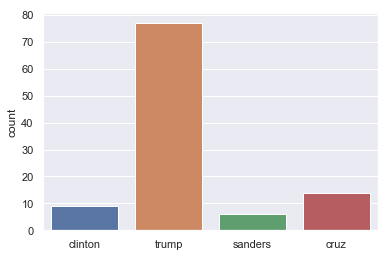

In [7]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()